<a href="https://colab.research.google.com/github/pranavamshu4/Machine-learning/blob/master/Sol2_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K- Means Clustering


In [11]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load the iris dataset
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 4)

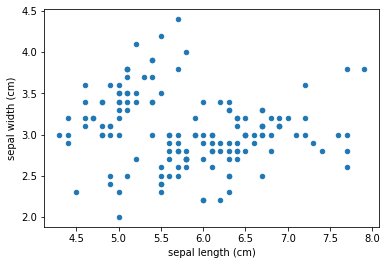

In [7]:
df.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")


Exploratory Data Analysis

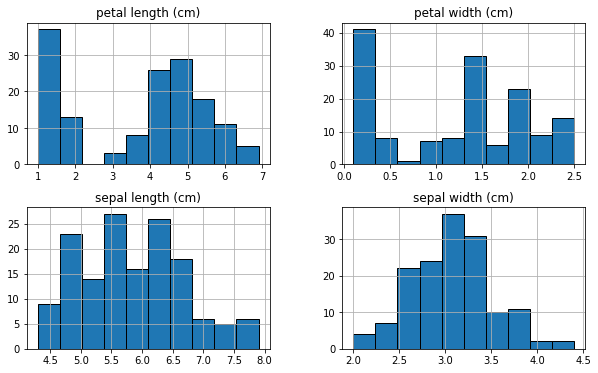

In [9]:
df.hist(edgecolor='black',figsize=(10,6))
plt.show()

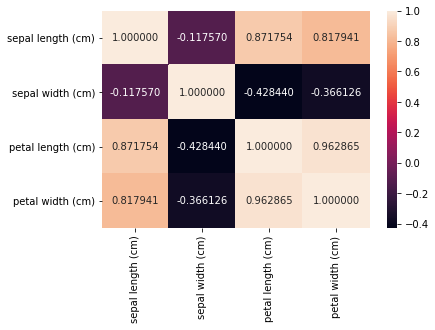

In [12]:
sns.heatmap(df.corr(),annot=True,fmt='f')
plt.show()


Predicting the optimum number of clusters using Elbow Method

In [14]:
x = df.iloc[:, [0, 1, 2, 3]].values

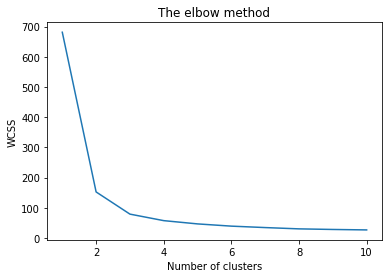

In [15]:
# Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

IN ELBOW METHOD THE OPTIMUM NUMBER OF CLUSTERS IS WHERE THE ELBOW OCCURS
,Clearly elbow occurs at 3 
,So optimum number of clusters are 3

In [18]:
# Applying kmeans to the dataset / Creating the kmeans classifier
km=KMeans(n_clusters=3,n_init=10,max_iter=500,init='k-means++',random_state=1)
y=km.fit_predict(x)

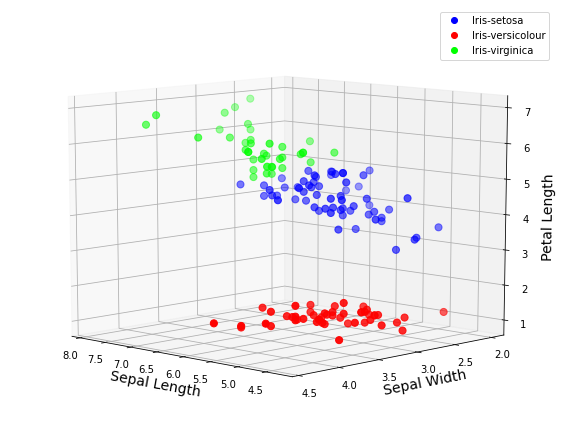

In [19]:
# Visualising the clusters in 3D
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1],elev=10,azim=134)
plt.cla()

ax.set_xlabel('Sepal Length',fontsize=14)
ax.set_ylabel('Sepal Width',fontsize=14)
ax.set_zlabel('Petal Length',fontsize=14)

sc=ax.scatter(x[:,0], x[:, 1], x[:,2], c=y.astype(np.float),s=50,cmap='brg')

t=ax.legend(*sc.legend_elements())
t.get_texts()[0].set_text('Iris-setosa')
t.get_texts()[1].set_text('Iris-versicolour')
t.get_texts()[2].set_text('Iris-virginica')

plt.show()